In [351]:
import pylib.BenchmarkingUtilAdj
from importlib import reload
reload(pylib.BenchmarkingUtilAdj)

from pylib.BenchmarkingUtilAdj import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = '../simulated_bulk_analysis/report_data'
sample_id = 'truncated_bulk_rnaseq'

## Preparing input data

In [4]:
refFileList = getFiles(data_dir + '/reference/', 'reference')


refFileList

[('../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_10.gtf',
  '../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv'),
 ('../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_20.gtf',
  '../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv'),
 ('../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_30.gtf',
  '../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv'),
 ('../simulated_bulk_analysis/report_data/reference/benchmark_full_annotations.gtf',
  '../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv')]

In [17]:
ref_gtf_file = data_dir + "/reference/benchmark_full_annotations.gtf"
ref_quant_file = data_dir + "/reference/benchmark_transcript_expression.tsv"

In [72]:
ref_gtf_df = parseGTFtoIntronIDs(ref_gtf_file)

ref_gtf_df

-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_full_annotations.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


,transcript_id,intronId,gene_id
0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",ENSG00000004059
1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",ENSG00000003056
2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",ENSG00000004478
3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",ENSG00000003137
4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",ENSG00000003509
...,...,...,...
32968,ENST00000641815,"11:59713790-59728513:+,11:59728690-59773210:+,...",ENSG00000166900
32969,ENST00000642017,"17:47941813-47943305:+,17:47943430-47944615:+,...",ENSG00000108439
32970,ENST00000642050,"1:40074183-40076841:-,1:40076913-40078559:-,1:...",ENSG00000131238
32971,ENST00000642087,7:150405904-150407583:+,ENSG00000284691


In [73]:
ref_quant_df = getQuantDf(ref_quant_file)

ref_quant_df

,transcript_id,tpm
0,ENST00000000233,238.976990
1,ENST00000000412,106.719277
2,ENST00000001008,211.583807
3,ENST00000001146,0.856037
4,ENST00000002125,16.978067
...,...,...
32968,ENST00000641815,106.719277
32969,ENST00000642017,22.399634
32970,ENST00000642050,105.007203
32971,ENST00000642087,2.853457


In [79]:
ref_gtf_df.merge(ref_quant_df, how='inner', on='transcript_id')

,transcript_id,intronId,gene_id,tpm
0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",ENSG00000004059,238.976990
1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",ENSG00000003056,106.719277
2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",ENSG00000004478,211.583807
3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",ENSG00000003137,0.856037
4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",ENSG00000003509,16.978067
...,...,...,...,...
32968,ENST00000641815,"11:59713790-59728513:+,11:59728690-59773210:+,...",ENSG00000166900,106.719277
32969,ENST00000642017,"17:47941813-47943305:+,17:47943430-47944615:+,...",ENSG00000108439,22.399634
32970,ENST00000642050,"1:40074183-40076841:-,1:40076913-40078559:-,1:...",ENSG00000131238,105.007203
32971,ENST00000642087,7:150405904-150407583:+,ENSG00000284691,2.853457


In [80]:
ref_df = parseGTFtoIntronIDsandQuants(ref_gtf_file, ref_quant_file)

ref_df

-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_full_annotations.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


,index,transcript_id,intronId,gene_id,tpm
0,0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",ENSG00000004059,238.976990
1,1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",ENSG00000003056,106.719277
2,2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",ENSG00000004478,211.583807
3,3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",ENSG00000003137,0.856037
4,4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",ENSG00000003509,16.978067
...,...,...,...,...,...
32968,32968,ENST00000641815,"11:59713790-59728513:+,11:59728690-59773210:+,...",ENSG00000166900,106.719277
32969,32969,ENST00000642017,"17:47941813-47943305:+,17:47943430-47944615:+,...",ENSG00000108439,22.399634
32970,32970,ENST00000642050,"1:40074183-40076841:-,1:40076913-40078559:-,1:...",ENSG00000131238,105.007203
32971,32971,ENST00000642087,7:150405904-150407583:+,ENSG00000284691,2.853457


In [81]:
i_ref_df = indexDfByIntronId(ref_df)

i_ref_df

,transcript_ids,gene_ids,tpm
intronId,,,
"10:100042573-100048757:-,10:100048876-100054346:-,10:100054446-100057012:-,10:100057152-100063613:-,10:100063725-100065187:-,10:100065370-100069713:-,10:100069869-100075910:-,10:100076107-100081402:-",ENST00000370418,ENSG00000120054,0.285346
"10:100152352-100154859:-,10:100154939-100156144:-,10:100156234-100164003:-,10:100164095-100167347:-,10:100167406-100174207:-,10:100174281-100175944:-,10:100176070-100178132:-,10:100178194-100179200:-,10:100179247-100183755:-,10:100183837-100185513:-",ENST00000421367,ENSG00000107566,72.049779
"10:100189627-100190868:-,10:100190968-100193297:-,10:100193431-100193983:-,10:100194131-100194424:-,10:100194521-100199970:-,10:100200020-100200670:-,10:100200780-100202087:-,10:100202149-100204505:-,10:100204657-100205075:-,10:100205199-100207229:-,10:100207332-100209594:-,10:100209789-100217994:-,10:100218130-100218717:-,10:100218825-100219007:-,10:100219132-100219269:-,10:100219359-100220587:-,10:100220676-100222111:-,10:100222181-100222865:-,10:100222980-100225922:-,10:100226017-100229427:-",ENST00000370397,ENSG00000213341,18.690141
"10:100233371-100235666:-,10:100235764-100236849:-,10:100236969-100238021:-,10:100238231-100243697:-,10:100243777-100245798:-,10:100245913-100246794:-,10:100246935-100250247:-,10:100250332-100253420:-,10:100253539-100256261:-,10:100256476-100260217:-,10:100260319-100260965:-,10:100261044-100261978:-,10:100262063-100267570:-",ENST00000354105,ENSG00000095485,25.966455
"10:100275493-100280123:-,10:100280228-100280933:-,10:100281053-100282905:-",ENST00000618916,ENSG00000196072,0.428018
...,...,...,...
"Y:12904414-12904934:+,Y:12904981-12907536:+,Y:12907594-12909359:+,Y:12909407-12911838:+,Y:12911968-12912726:+,Y:12912882-12912962:+,Y:12913062-12913717:+,Y:12913853-12914563:+,Y:12914649-12914883:+,Y:12914982-12915066:+,Y:12915227-12915629:+,Y:12915774-12915882:+,Y:12916027-12916260:+,Y:12916442-12916516:+,Y:12916634-12916906:+,Y:12917060-12917402:+,Y:12917542-12918042:+",ENST00000360160,ENSG00000067048,0.570691
"Y:20575887-20579607:+,Y:20579691-20582589:+,Y:20582693-20584473:+,Y:20584524-20588023:+,Y:20588105-20589483:+,Y:20589575-20592340:+",ENST00000361365,ENSG00000198692,0.285346
"Y:20575887-20579607:+,Y:20579691-20582589:+,Y:20582693-20588023:+,Y:20588105-20589483:+,Y:20589575-20592340:+",ENST00000382772,ENSG00000198692,0.285346


In [82]:
downsampled_10_gtf = data_dir + "/reference/benchmark_downsampled_10.gtf"
downsampled_20_gtf = data_dir + "/reference/benchmark_downsampled_20.gtf"
downsampled_30_gtf = data_dir + "/reference/benchmark_downsampled_30.gtf"

In [83]:
downsampled_10_gtf_df = parseGTFtoIntronIDs(downsampled_10_gtf)

downsampled_10_gtf_df


-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


,transcript_id,intronId,gene_id
0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",ENSG00000004059
1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",ENSG00000003056
2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",ENSG00000004478
3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",ENSG00000003137
4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",ENSG00000003509
...,...,...,...
29671,ENST00000641815,"11:59713790-59728513:+,11:59728690-59773210:+,...",ENSG00000166900
29672,ENST00000642017,"17:47941813-47943305:+,17:47943430-47944615:+,...",ENSG00000108439
29673,ENST00000642050,"1:40074183-40076841:-,1:40076913-40078559:-,1:...",ENSG00000131238
29674,ENST00000642087,7:150405904-150407583:+,ENSG00000284691


In [84]:
downsampled_20_gtf_df = parseGTFtoIntronIDs(downsampled_20_gtf)

downsampled_20_gtf_df

-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


,transcript_id,intronId,gene_id
0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",ENSG00000004059
1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",ENSG00000003056
2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",ENSG00000004478
3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",ENSG00000003137
4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",ENSG00000003509
...,...,...,...
26373,ENST00000641717,"7:150405478-150407583:+,7:150407863-150410159:+",ENSG00000284691
26374,ENST00000641815,"11:59713790-59728513:+,11:59728690-59773210:+,...",ENSG00000166900
26375,ENST00000642017,"17:47941813-47943305:+,17:47943430-47944615:+,...",ENSG00000108439
26376,ENST00000642050,"1:40074183-40076841:-,1:40076913-40078559:-,1:...",ENSG00000131238


In [85]:
downsampled_30_gtf_df = parseGTFtoIntronIDs(downsampled_30_gtf)

downsampled_30_gtf_df

-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


,transcript_id,intronId,gene_id
0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",ENSG00000004059
1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",ENSG00000003056
2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",ENSG00000004478
3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",ENSG00000003137
4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",ENSG00000003509
...,...,...,...
23076,ENST00000641471,"1:40074183-40076841:-,1:40076913-40078559:-,1:...",ENSG00000131238
23077,ENST00000641815,"11:59713790-59728513:+,11:59728690-59773210:+,...",ENSG00000166900
23078,ENST00000642017,"17:47941813-47943305:+,17:47943430-47944615:+,...",ENSG00000108439
23079,ENST00000642050,"1:40074183-40076841:-,1:40076913-40078559:-,1:...",ENSG00000131238


In [89]:
i_downsampled_10_gtf_df = indexDfByIntronId(downsampled_10_gtf_df)
i_downsampled_20_gtf_df = indexDfByIntronId(downsampled_20_gtf_df)
i_downsampled_30_gtf_df = indexDfByIntronId(downsampled_30_gtf_df)

i_downsampled_10_gtf_df['down_10'] = True
i_downsampled_20_gtf_df['down_20'] = True
i_downsampled_30_gtf_df['down_30'] = True

In [94]:
i_ref_df = i_ref_df.join(i_downsampled_10_gtf_df['down_10'])
i_ref_df = i_ref_df.join(i_downsampled_20_gtf_df['down_20'])
i_ref_df = i_ref_df.join(i_downsampled_30_gtf_df['down_30'])

i_ref_df.fillna(False, inplace=True)

i_ref_df

In [95]:
i_ref_df.head()

,transcript_ids,gene_ids,tpm,down_10,down_20,down_30
intronId,,,,,,
"10:100042573-100048757:-,10:100048876-100054346:-,10:100054446-100057012:-,10:100057152-100063613:-,10:100063725-100065187:-,10:100065370-100069713:-,10:100069869-100075910:-,10:100076107-100081402:-",ENST00000370418,ENSG00000120054,0.285346,True,True,True
"10:100152352-100154859:-,10:100154939-100156144:-,10:100156234-100164003:-,10:100164095-100167347:-,10:100167406-100174207:-,10:100174281-100175944:-,10:100176070-100178132:-,10:100178194-100179200:-,10:100179247-100183755:-,10:100183837-100185513:-",ENST00000421367,ENSG00000107566,72.049779,True,True,True
"10:100189627-100190868:-,10:100190968-100193297:-,10:100193431-100193983:-,10:100194131-100194424:-,10:100194521-100199970:-,10:100200020-100200670:-,10:100200780-100202087:-,10:100202149-100204505:-,10:100204657-100205075:-,10:100205199-100207229:-,10:100207332-100209594:-,10:100209789-100217994:-,10:100218130-100218717:-,10:100218825-100219007:-,10:100219132-100219269:-,10:100219359-100220587:-,10:100220676-100222111:-,10:100222181-100222865:-,10:100222980-100225922:-,10:100226017-100229427:-",ENST00000370397,ENSG00000213341,18.690141,True,True,True
"10:100233371-100235666:-,10:100235764-100236849:-,10:100236969-100238021:-,10:100238231-100243697:-,10:100243777-100245798:-,10:100245913-100246794:-,10:100246935-100250247:-,10:100250332-100253420:-,10:100253539-100256261:-,10:100256476-100260217:-,10:100260319-100260965:-,10:100261044-100261978:-,10:100262063-100267570:-",ENST00000354105,ENSG00000095485,25.966455,True,True,True
"10:100275493-100280123:-,10:100280228-100280933:-,10:100281053-100282905:-",ENST00000618916,ENSG00000196072,0.428018,True,True,True


In [97]:
i_ref_df.copy().reset_index().to_csv("refDf.intron_ids_and_expression.tsv", sep="\t", index=False)

In [102]:
parseGTFtoIntronIDsandQuants("../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf",
                             "../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.tsv")

-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


,index,transcript_id,intronId,tpm
0,0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",236.813575
1,1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",110.537207
2,2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",161.163289
3,3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",0.722905
4,4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",18.847543
...,...,...,...,...
26620,26620,ESPRESSO:X:5375:0,X:38801487-38802534:+,0.216763
26621,26621,ESPRESSO:X:5375:1,X:38804413-38804682:+,6.069364
26622,26622,ESPRESSO:X:5379:0,"X:40581102-40588985:+,X:40589116-40591233:+,X:...",3.150650
26623,26623,ESPRESSO:X:5513:0,X:71167800-71169253:+,0.216763


In [106]:
intron_df = parseGTFtoIntronIDs("../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf")

-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


In [107]:
quants_df = parseQuantsTSV("../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.tsv")

In [108]:
intron_df

,transcript_id,intronId
0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:..."
1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8..."
2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2..."
3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:..."
4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:..."
...,...,...
26620,ESPRESSO:X:5375:0,X:38801487-38802534:+
26621,ESPRESSO:X:5375:1,X:38804413-38804682:+
26622,ESPRESSO:X:5379:0,"X:40581102-40588985:+,X:40589116-40591233:+,X:..."
26623,ESPRESSO:X:5513:0,X:71167800-71169253:+


In [109]:
quants_df

,transcript_id,tpm
0,ENST00000000233,236.813575
1,ENST00000000412,110.537207
2,ENST00000001008,161.163289
3,ENST00000001146,0.722905
4,ENST00000002125,18.847543
...,...,...
26620,ESPRESSO:X:5375:0,0.216763
26621,ESPRESSO:X:5375:1,6.069364
26622,ESPRESSO:X:5379:0,3.150650
26623,ESPRESSO:X:5513:0,0.216763


In [111]:
intron_df.merge(quants_df, how="inner", on="transcript_id").reset_index()

,index,transcript_id,intronId,tpm
0,0,ENST00000000233,"7:127588565-127589082:+,7:127589163-127589484:...",236.813575
1,1,ENST00000000412,"12:8941940-8942415:-,12:8942542-8943404:-,12:8...",110.537207
2,2,ENST00000001008,"12:2795244-2797137:+,12:2797282-2797728:+,12:2...",161.163289
3,3,ENST00000001146,"2:72132619-72133022:-,2:72133307-72134760:-,2:...",0.722905
4,4,ENST00000002125,"2:37231760-37232105:+,2:37232266-37236095:+,2:...",18.847543
...,...,...,...,...
26620,26620,ESPRESSO:X:5375:0,X:38801487-38802534:+,0.216763
26621,26621,ESPRESSO:X:5375:1,X:38804413-38804682:+,6.069364
26622,26622,ESPRESSO:X:5379:0,"X:40581102-40588985:+,X:40589116-40591233:+,X:...",3.150650
26623,26623,ESPRESSO:X:5513:0,X:71167800-71169253:+,0.216763


In [117]:
# quants based on the full ref annot

flair_trans_id_modifier_func = lambda x: x.split("_")[0]

fileList = getFiles('{0}/{1}_quant/'.format(data_dir, sample_id), 'sample')
fullQuantsDf_dict = {}
for file in fileList:
    gtf, tsv = file[0], file[1]
    #annotatedDfList.append(countsWithIntronIds(gtf, tsv))
    progname = gtf.split("/")[-1].split(".")[0]
    transcript_id_modifier_func = flair_trans_id_modifier_func if "flair" in progname else None
    print(progname, gtf, tsv)
    fullQuantsDf_dict[progname] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf, tsv, transcript_id_modifier_func))
    

LRAA ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/LRAA.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/LRAA.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/LRAA.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


bambu ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/bambu.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/bambu.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/bambu.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


espresso ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


flair ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


isoquant ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isoquant.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isoquant.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isoquant.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


isosceles ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isosceles.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isosceles.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isosceles.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


liqa ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/liqa.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/liqa.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/liqa.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


nanocount ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/nanocount.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/nanocount.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/nanocount.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


In [118]:
for progname, df in fullQuantsDf_dict.items():
    print(progname)
    print(df.head())
    

LRAA
                                                     transcript_ids  \
intronId                                                              
10:100042573-100048757:-,10:100048876-100054346...  ENST00000370418   
10:100152352-100154859:-,10:100154939-100156144...  ENST00000421367   
10:100189627-100190868:-,10:100190968-100193297...  ENST00000370397   
10:100233371-100235666:-,10:100235764-100236849...  ENST00000354105   
10:100275493-100280123:-,10:100280228-100280933...  ENST00000618916   

                                                           gene_ids     tpm  
intronId                                                                     
10:100042573-100048757:-,10:100048876-100054346...  ENSG00000120054   0.086  
10:100152352-100154859:-,10:100154939-100156144...  ENSG00000107566  66.737  
10:100189627-100190868:-,10:100190968-100193297...  ENSG00000213341  23.842  
10:100233371-100235666:-,10:100235764-100236849...  ENSG00000095485  21.530  
10:100275493-100280123:-,10:1

In [119]:
# flair has problem ids. Handle it directly here.

flair_gtf = "../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.gtf"
flair_tsv = "../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.tsv"

flair_gtf_df = parseGTFtoIntronIDs(flair_gtf)


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


NameError: name 'fliar_gtf_df' is not defined

In [122]:
flair_gtf_df['transcript_id'] = flair_gtf_df['transcript_id'].apply(lambda x: x.split("_")[0])

In [123]:
flair_quants_df = parseQuantsTSV(flair_tsv)

flair_quants_df['transcript_id'] = flair_quants_df['transcript_id'].apply(lambda x: x.split("_")[0])

In [124]:
flair_df = flair_gtf_df.merge(flair_quants_df, how="inner", on="transcript_id")

In [126]:
i_flair_df = indexDfByIntronId(flair_df)
i_flair_df

,transcript_ids,gene_ids,tpm
intronId,,,
"10:100152352-100154859:-,10:100154939-100156144:-,10:100156234-100164003:-,10:100164095-100167347:-,10:100167406-100174207:-,10:100174281-100175944:-,10:100176070-100178132:-,10:100178194-100179200:-,10:100179247-100183755:-,10:100183837-100185513:-","ENST00000421367,ENST00000421367","ENSG00000107566,ENSG00000107566",49.494547
"10:100154939-100156144:-,10:100156234-100164003:-,10:100164095-100167347:-,10:100167406-100174207:-,10:100174281-100175944:-,10:100176070-100178132:-,10:100178194-100179200:-,10:100179247-100183755:-,10:100183837-100185513:-","ENST00000421367,ENST00000421367","ENSG00000107566,ENSG00000107566",49.494547
"10:100189627-100190868:-,10:100190968-100193297:-,10:100193431-100193983:-,10:100194131-100194424:-,10:100194521-100199970:-,10:100200020-100200670:-,10:100200780-100202087:-,10:100202149-100204505:-,10:100204657-100205075:-,10:100205199-100207229:-,10:100207332-100209594:-,10:100209789-100217994:-,10:100218130-100218717:-,10:100218825-100219007:-,10:100219132-100219269:-,10:100219359-100220587:-,10:100220676-100222111:-,10:100222181-100222865:-,10:100222980-100225922:-,10:100226017-100229427:-",ENST00000370397,ENSG00000213341,30.763185
"10:100233371-100235666:-,10:100235764-100236849:-,10:100236969-100238021:-,10:100238231-100243697:-,10:100243777-100245798:-,10:100245913-100246794:-,10:100246935-100250247:-,10:100250332-100253420:-,10:100253539-100256261:-,10:100256476-100260217:-,10:100260319-100260965:-,10:100261044-100261978:-,10:100262063-100267570:-",ENST00000354105,ENSG00000095485,41.017581
"10:100275493-100280123:-,10:100280228-100280933:-,10:100281053-100282905:-",ENST00000618916,10:100273000,41.701207
...,...,...,...
"X:9896698-9898189:+,X:9898290-9932174:+,X:9932870-9937133:+,X:9937685-9939194:+,X:9939366-9944643:+,X:9944913-9946670:+","ENST00000380913,ENST00000380913","ENSG00000146950,ENSG00000146950",9.160593
"Y:12915227-12915629:+,Y:12915774-12915882:+,Y:12916027-12916260:+,Y:12916442-12916516:+,Y:12916634-12916906:+,Y:12917060-12917402:+,Y:12917542-12918042:+",ENST00000360160,ENSG00000067048,0.546901
"Y:20575887-20579607:+,Y:20579691-20582589:+,Y:20582693-20584473:+,Y:20584524-20588023:+,Y:20588105-20589483:+,Y:20589575-20592340:+",ENST00000361365,ENSG00000198692,0.410176


In [127]:
fullQuantsDf_dict['flair'] = i_flair_df

# Quant comparison for full ref annotations

In [131]:
i_ref_df.head()

,transcript_ids,gene_ids,tpm,down_10,down_20,down_30
intronId,,,,,,
"10:100042573-100048757:-,10:100048876-100054346:-,10:100054446-100057012:-,10:100057152-100063613:-,10:100063725-100065187:-,10:100065370-100069713:-,10:100069869-100075910:-,10:100076107-100081402:-",ENST00000370418,ENSG00000120054,0.285346,True,True,True
"10:100152352-100154859:-,10:100154939-100156144:-,10:100156234-100164003:-,10:100164095-100167347:-,10:100167406-100174207:-,10:100174281-100175944:-,10:100176070-100178132:-,10:100178194-100179200:-,10:100179247-100183755:-,10:100183837-100185513:-",ENST00000421367,ENSG00000107566,72.049779,True,True,True
"10:100189627-100190868:-,10:100190968-100193297:-,10:100193431-100193983:-,10:100194131-100194424:-,10:100194521-100199970:-,10:100200020-100200670:-,10:100200780-100202087:-,10:100202149-100204505:-,10:100204657-100205075:-,10:100205199-100207229:-,10:100207332-100209594:-,10:100209789-100217994:-,10:100218130-100218717:-,10:100218825-100219007:-,10:100219132-100219269:-,10:100219359-100220587:-,10:100220676-100222111:-,10:100222181-100222865:-,10:100222980-100225922:-,10:100226017-100229427:-",ENST00000370397,ENSG00000213341,18.690141,True,True,True
"10:100233371-100235666:-,10:100235764-100236849:-,10:100236969-100238021:-,10:100238231-100243697:-,10:100243777-100245798:-,10:100245913-100246794:-,10:100246935-100250247:-,10:100250332-100253420:-,10:100253539-100256261:-,10:100256476-100260217:-,10:100260319-100260965:-,10:100261044-100261978:-,10:100262063-100267570:-",ENST00000354105,ENSG00000095485,25.966455,True,True,True
"10:100275493-100280123:-,10:100280228-100280933:-,10:100281053-100282905:-",ENST00000618916,ENSG00000196072,0.428018,True,True,True


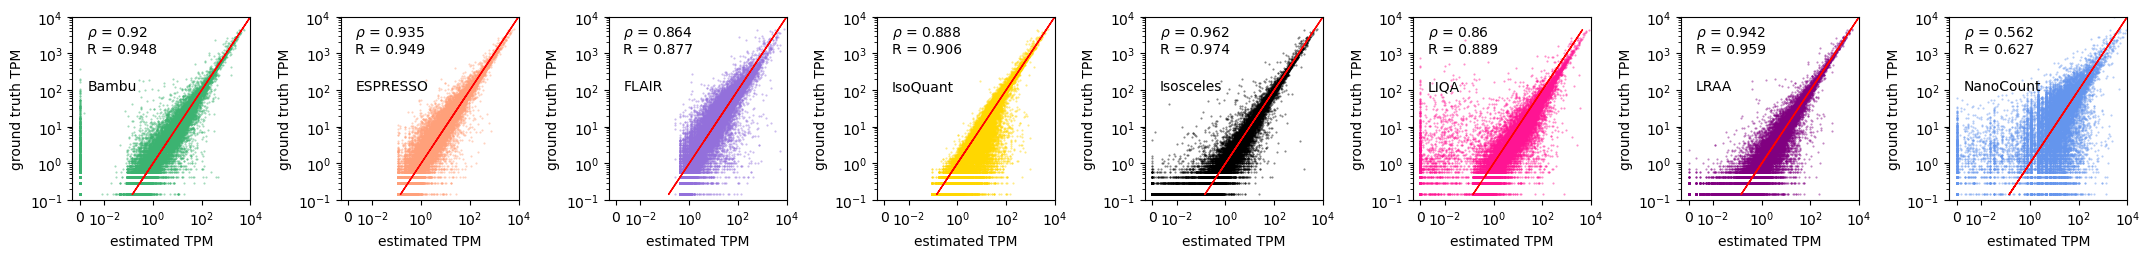

In [144]:
scatterplot_adj(i_ref_df, fullQuantsDf_dict)

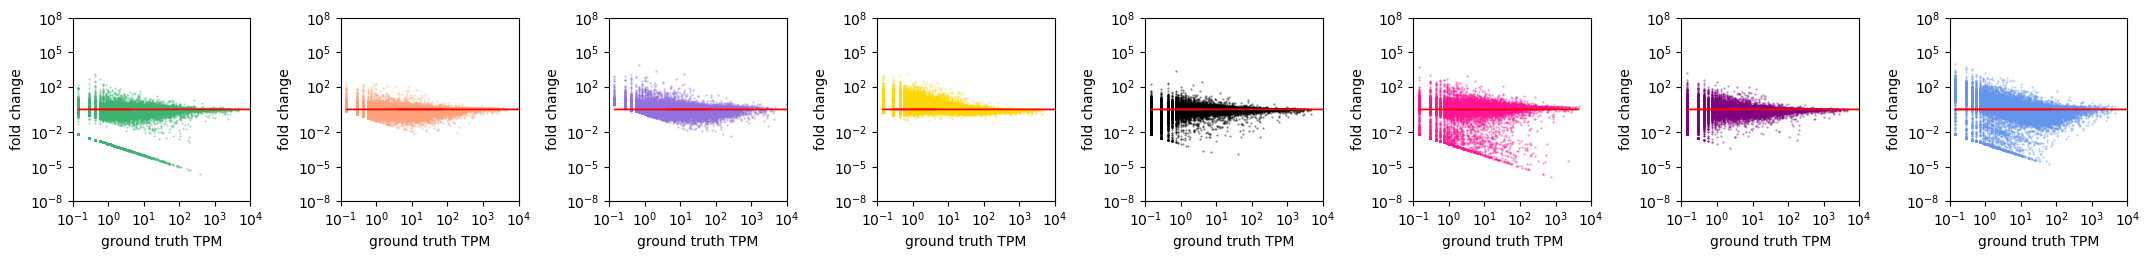

In [146]:
ma_plot_adj(i_ref_df, fullQuantsDf_dict)

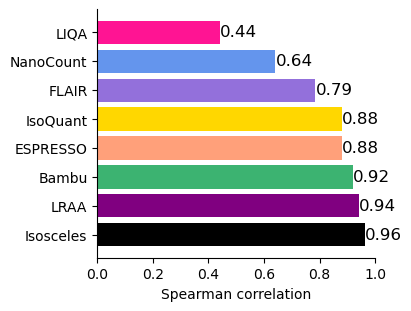

In [150]:
cor_spearman_barplot(i_ref_df, fullQuantsDf_dict)

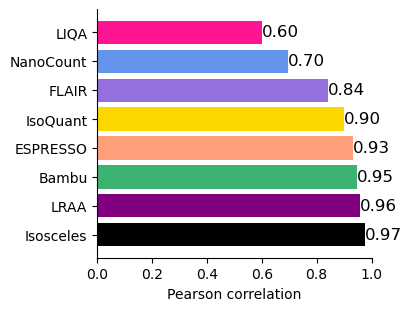

In [155]:
cor_pearson_barplot(i_ref_df, fullQuantsDf_dict)

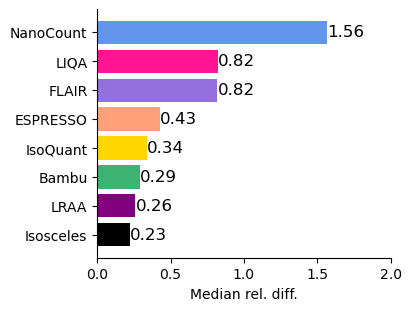

In [170]:
#rel_diff_barplot(refDf, annotatedDfList, 'mean')
rel_diff_barplot(i_ref_df, fullQuantsDf_dict, 'median')

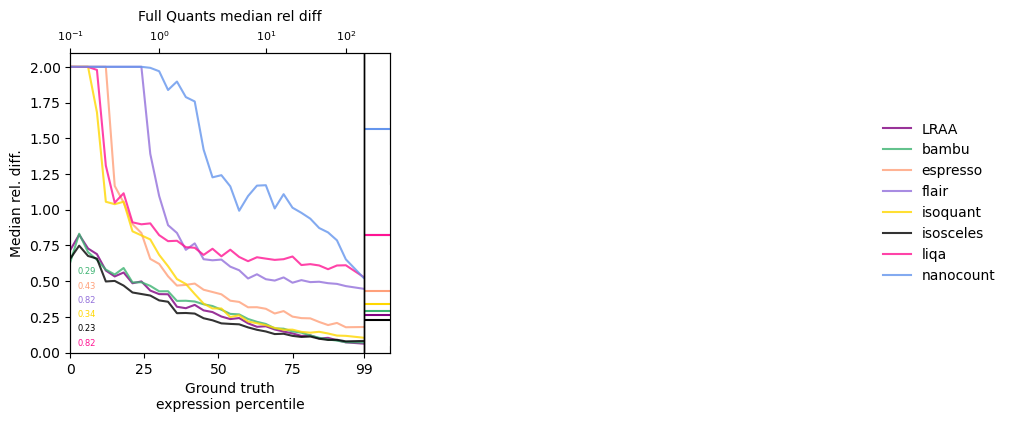

In [202]:
rel_diff_vs_expr_percentile_plot(i_ref_df, fullQuantsDf_dict, 33, 'median', 'Full Quants median rel diff')

In [161]:
prog_to_downsampled_df_dict = {}

flair_trans_id_modifier_func = lambda x: x.split("_")[0]

# has the downsampled gtfs as guides
fileList = getFiles('{0}/{1}_denovo/'.format(data_dir, sample_id), 'sample')
for file in fileList:
    gtf, tsv = file[0], file[1]
    progname_downsample = gtf.split("/")[-1].split(".")[0]
  
    print(progname_downsample, gtf, tsv)
    transcript_id_modifier_func = flair_trans_id_modifier_func if "flair" in progname_downsample else None
    #dfList.append(countsWithIntronIds(gtf, tsv))
    prog_to_downsampled_df_dict[progname_downsample] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf, tsv, transcript_id_modifier_func))
    
    

flair_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


flair_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


flair_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


In [163]:
for prog_downsample, df in prog_to_downsampled_df_dict.items():
    print(prog_downsample)
    df.copy().reset_index().to_csv(prog_downsample + ".intron_ids_and_expr.tsv", sep="\t", index=False)

LRAA_down10
LRAA_down20
LRAA_down30
bambu_down10
bambu_down20
bambu_down30
espresso_down10
espresso_down20
espresso_down30
flair_down10
flair_down20
flair_down30
isoquant_down10
isoquant_down20
isoquant_down30
isosceles_down10
isosceles_down20
isosceles_down30


In [165]:
# incorporate liqa and nanocount

fileList = getFiles('{0}/{1}_stringtie/'.format(data_dir, sample_id), 'sample')
for file in fileList:
    gtf, tsv = file[0], file[1]
    if "liqa" in gtf or "nanocount" in gtf:   
        progname_downsample = gtf.split("/")[-1].split(".")[0]
        print(progname_downsample, gtf, tsv)
        prog_to_downsampled_df_dict[progname_downsample] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf, tsv))
    

liqa_stringtie_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


liqa_stringtie_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


liqa_stringtie_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


nanocount_stringtie_down10 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down10.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down10.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


nanocount_stringtie_down20 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down20.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down20.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


nanocount_stringtie_down30 ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down30.gtf ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down30.tsv
-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


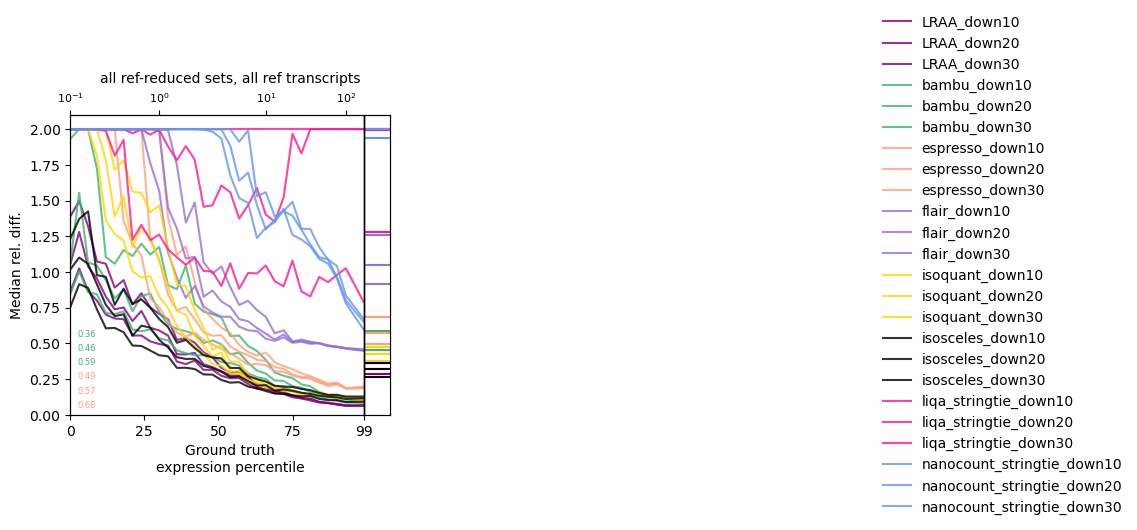

In [205]:
rel_diff_vs_expr_percentile_plot(i_ref_df, prog_to_downsampled_df_dict, 33, 'median', 'all ref-reduced sets, all ref transcripts')

# Down 10 ref-reduced

In [207]:
down_10_dict = { sample_name : prog_to_downsampled_df_dict[sample_name] 
                for sample_name in prog_to_downsampled_df_dict 
                if "down10" in sample_name}

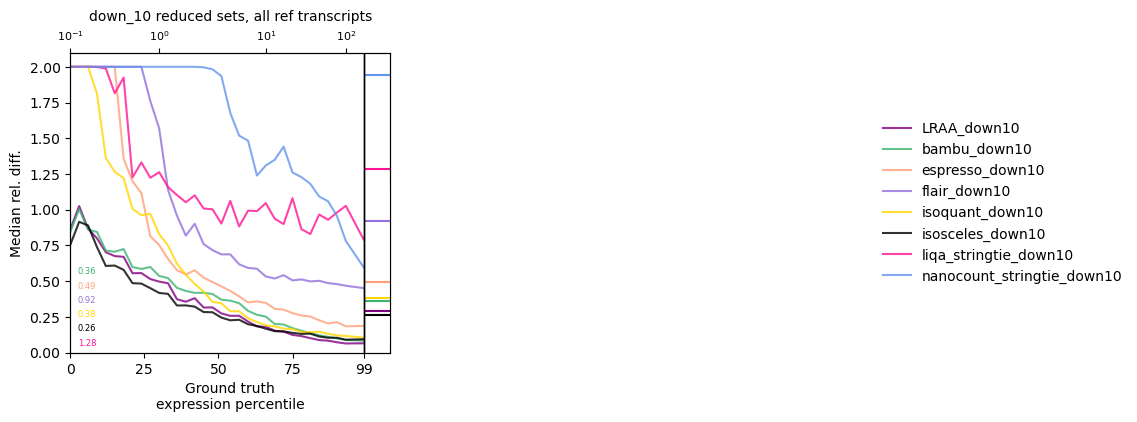

In [208]:
rel_diff_vs_expr_percentile_plot(i_ref_df, down_10_dict, 33, 'median', 'down_10 reduced sets, all ref transcripts')

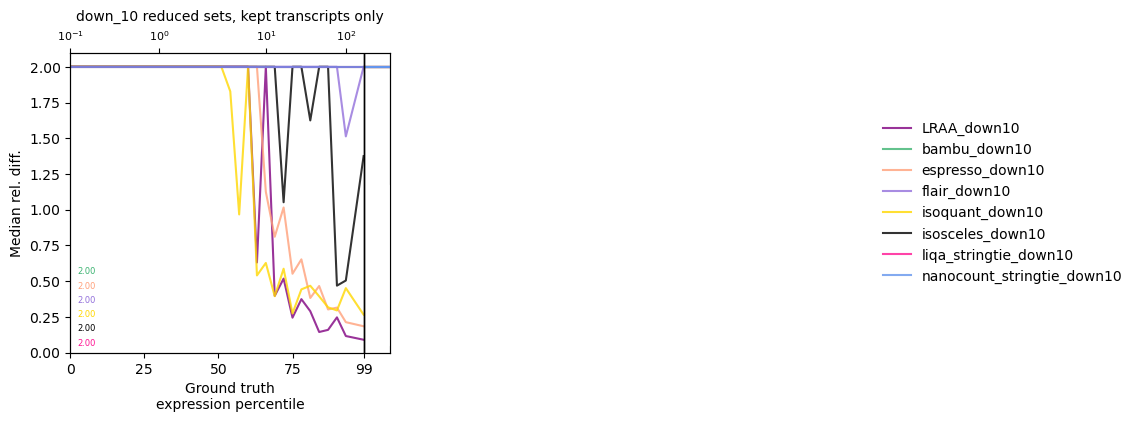

In [228]:
down_10_kept_intron_ids = i_ref_df[i_ref_df['down_10'] == False].index

rel_diff_vs_expr_percentile_plot(i_ref_df, down_10_dict, 33, 'median', 'down_10 reduced sets, kept transcripts only', 
                                intron_ids_use = down_10_kept_intron_ids)

# down_20

In [230]:
down_20_dict = { sample_name : prog_to_downsampled_df_dict[sample_name] 
                for sample_name in prog_to_downsampled_df_dict 
                if "down20" in sample_name}

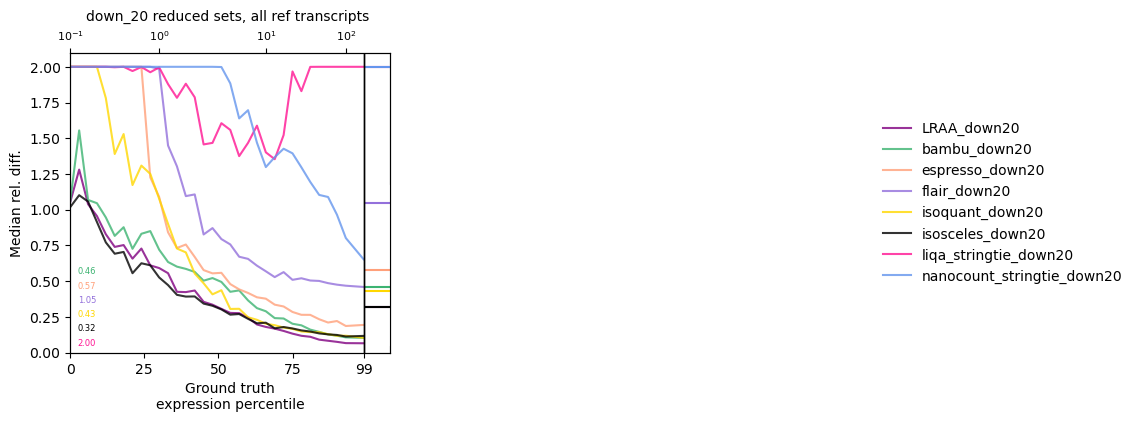

In [232]:
rel_diff_vs_expr_percentile_plot(i_ref_df, down_20_dict, 33, 'median', 'down_20 reduced sets, all ref transcripts ')

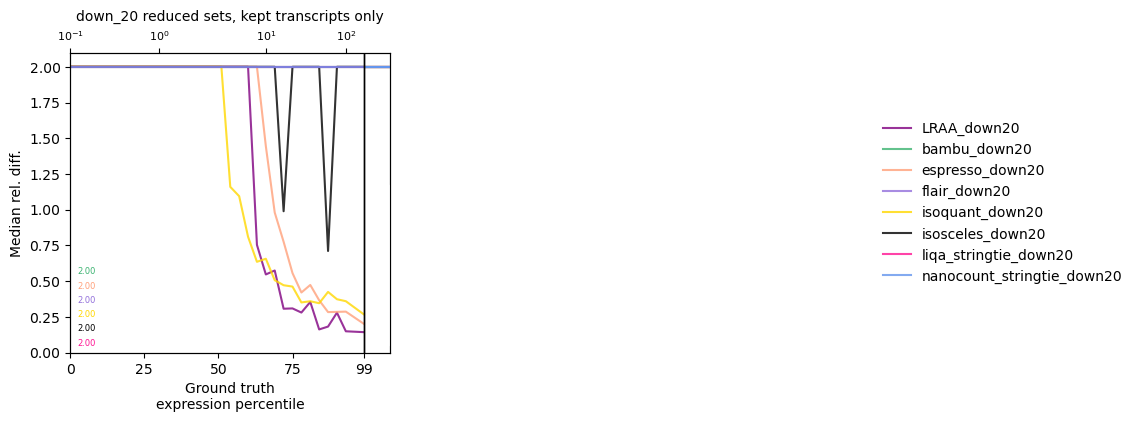

In [231]:
down_20_kept_intron_ids = i_ref_df[i_ref_df['down_20'] == False].index

rel_diff_vs_expr_percentile_plot(i_ref_df, down_20_dict, 33, 'median', 'down_20 reduced sets, kept transcripts only', 
                                intron_ids_use = down_20_kept_intron_ids)

# down_30 

In [233]:
down_30_dict = { sample_name : prog_to_downsampled_df_dict[sample_name] 
                for sample_name in prog_to_downsampled_df_dict 
                if "down30" in sample_name}

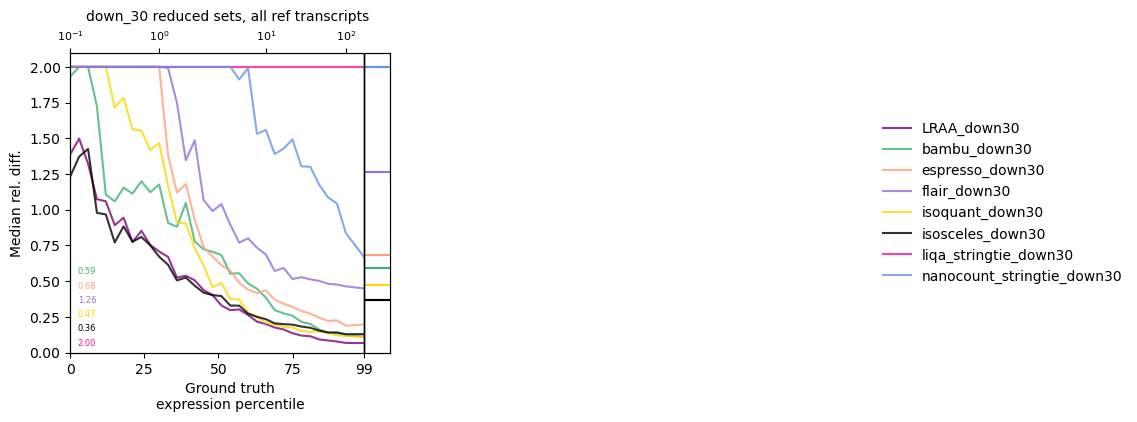

In [234]:
rel_diff_vs_expr_percentile_plot(i_ref_df, down_30_dict, 33, 'median', 'down_30 reduced sets, all ref transcripts ')

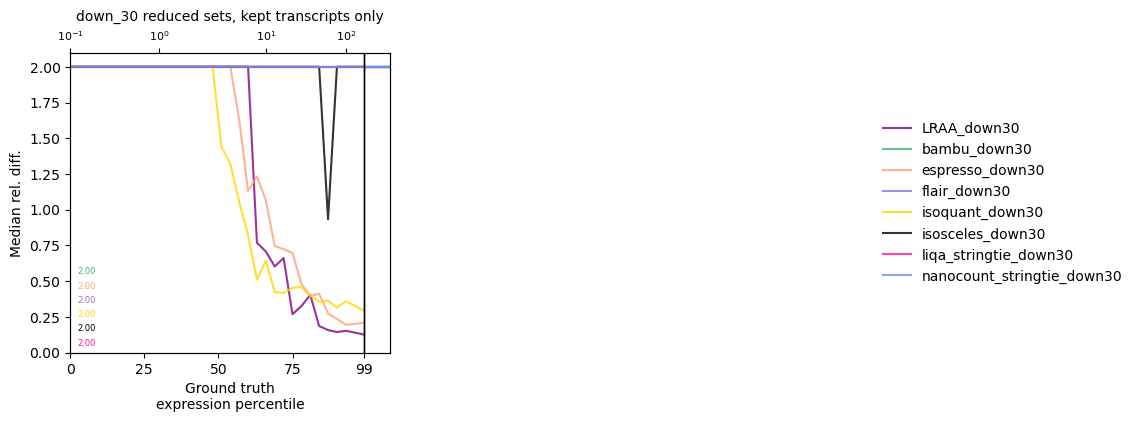

In [235]:
down_30_kept_intron_ids = i_ref_df[i_ref_df['down_30'] == False].index

rel_diff_vs_expr_percentile_plot(i_ref_df, down_30_dict, 33, 'median', 'down_30 reduced sets, kept transcripts only', 
                                intron_ids_use = down_30_kept_intron_ids)

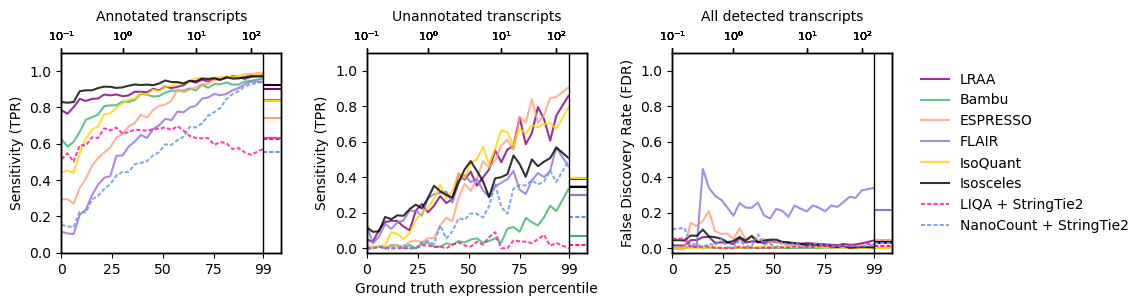

In [288]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_10_dict, 33, 'median', 'ladeda', down_10_kept_intron_ids)

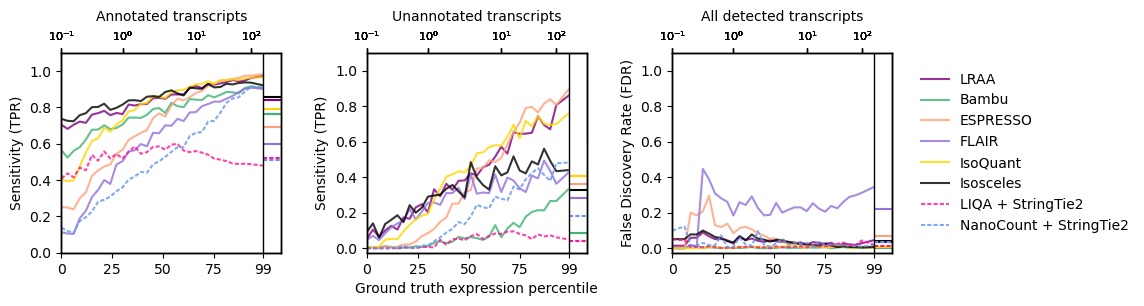

In [287]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_20_dict, 33, 'median', 'ladeda', down_20_kept_intron_ids)

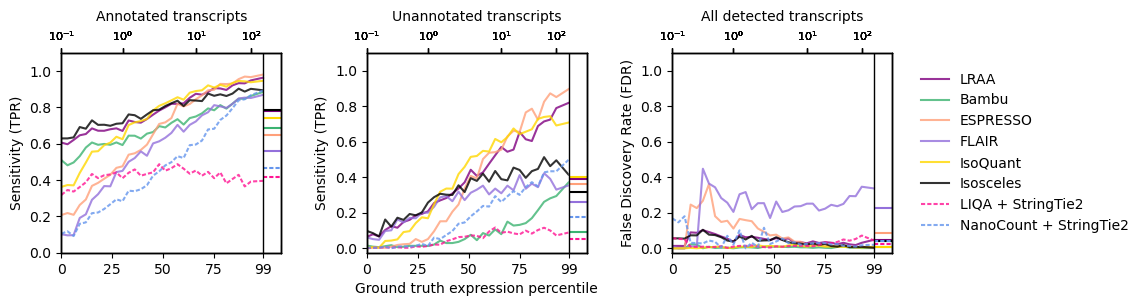

In [293]:
IsoformIdentificationSensitivityPlot(i_ref_df, down_30_dict, 33, 'median', 'ladeda', down_30_kept_intron_ids)

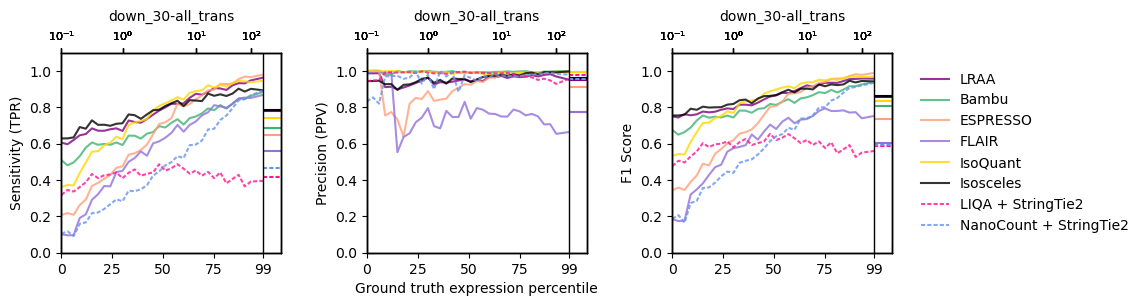

In [322]:
TPR_F1_PPV_plot(i_ref_df, down_30_dict, 33, 'median', 'down_30-all_trans')

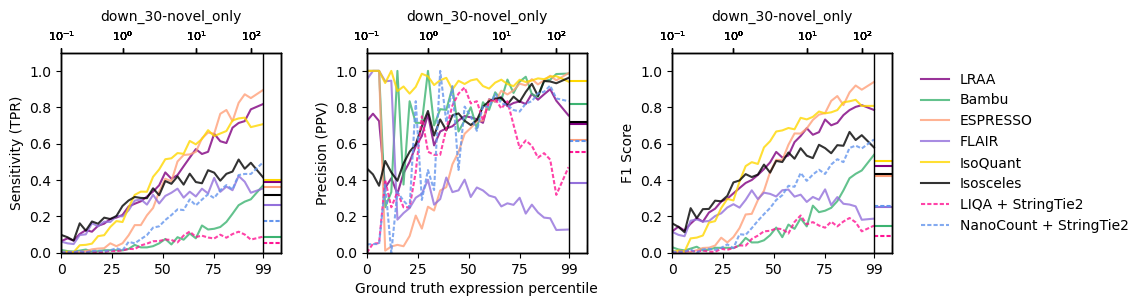

In [321]:
TPR_F1_PPV_plot(i_ref_df, down_30_dict, 33, 'median', 'down_30-novel_only', down_30_kept_intron_ids)

In [ ]:
overall_knownTPR_novelTPR_and_FDR_barplot

In [ ]:
sensitivityStatBarPlot(refDf, dfList, 33)               
sensitivityStatBarPlot(refDf, stringtieDfList, 33)
sensitivityStatBarPlot(refDf, bestDfList, 33)

## Annotated sensitivity, unannotated sensitivity, and FDR for
## down-10, 20, and 30 (rows)


In [333]:
calc_accuracy_stats_for_TP_FP_FN_df(i_sample_TP_FP_FN_df, down_30_kept_intron_ids.values)

{'Sensitivity': 0.347914963205233,
 'PPV': 0.730942666952974,
 'FDR': 0.269057333047026,
 'F1': 0.4714354961567758}

In [332]:
down_30_kept_intron_ids.values

array(['10:100275493-100280123:-,10:100280228-100280933:-,10:100281053-100286096:-',
       '10:100523929-100526398:-,10:100526554-100526974:-,10:100527074-100529379:-,10:100529506-100529766:-',
       '10:100746303-100749745:+,10:100749914-100750693:+,10:100750891-100779497:+,10:100779583-100781245:+,10:100781365-100786942:+,10:100787011-100806429:+,10:100806605-100809109:+,10:100809236-100824647:+,10:100824749-100827008:+,10:100827095-100827542:+',
       ...,
       'X:96685190-96735757:+,X:96735790-96738585:+,X:96738762-96758153:+,X:96758258-96881578:+,X:96881718-96912327:+,X:96912402-96912482:+,X:96912552-96916437:+,X:96916574-96918508:+,X:96918617-96930732:+,X:96930843-96937232:+,X:96937351-96939265:+,X:96939382-96942017:+,X:96942136-96945526:+,X:96945591-96948934:+,X:96949039-96957827:+,X:96958148-96965092:+,X:96965207-97072940:+,X:97073042-97075166:+,X:97075261-97099693:+,X:97099795-97114725:+,X:97114965-97141664:+,X:97141794-97247714:+,X:97247841-97348117:+,X:97348280-97383908

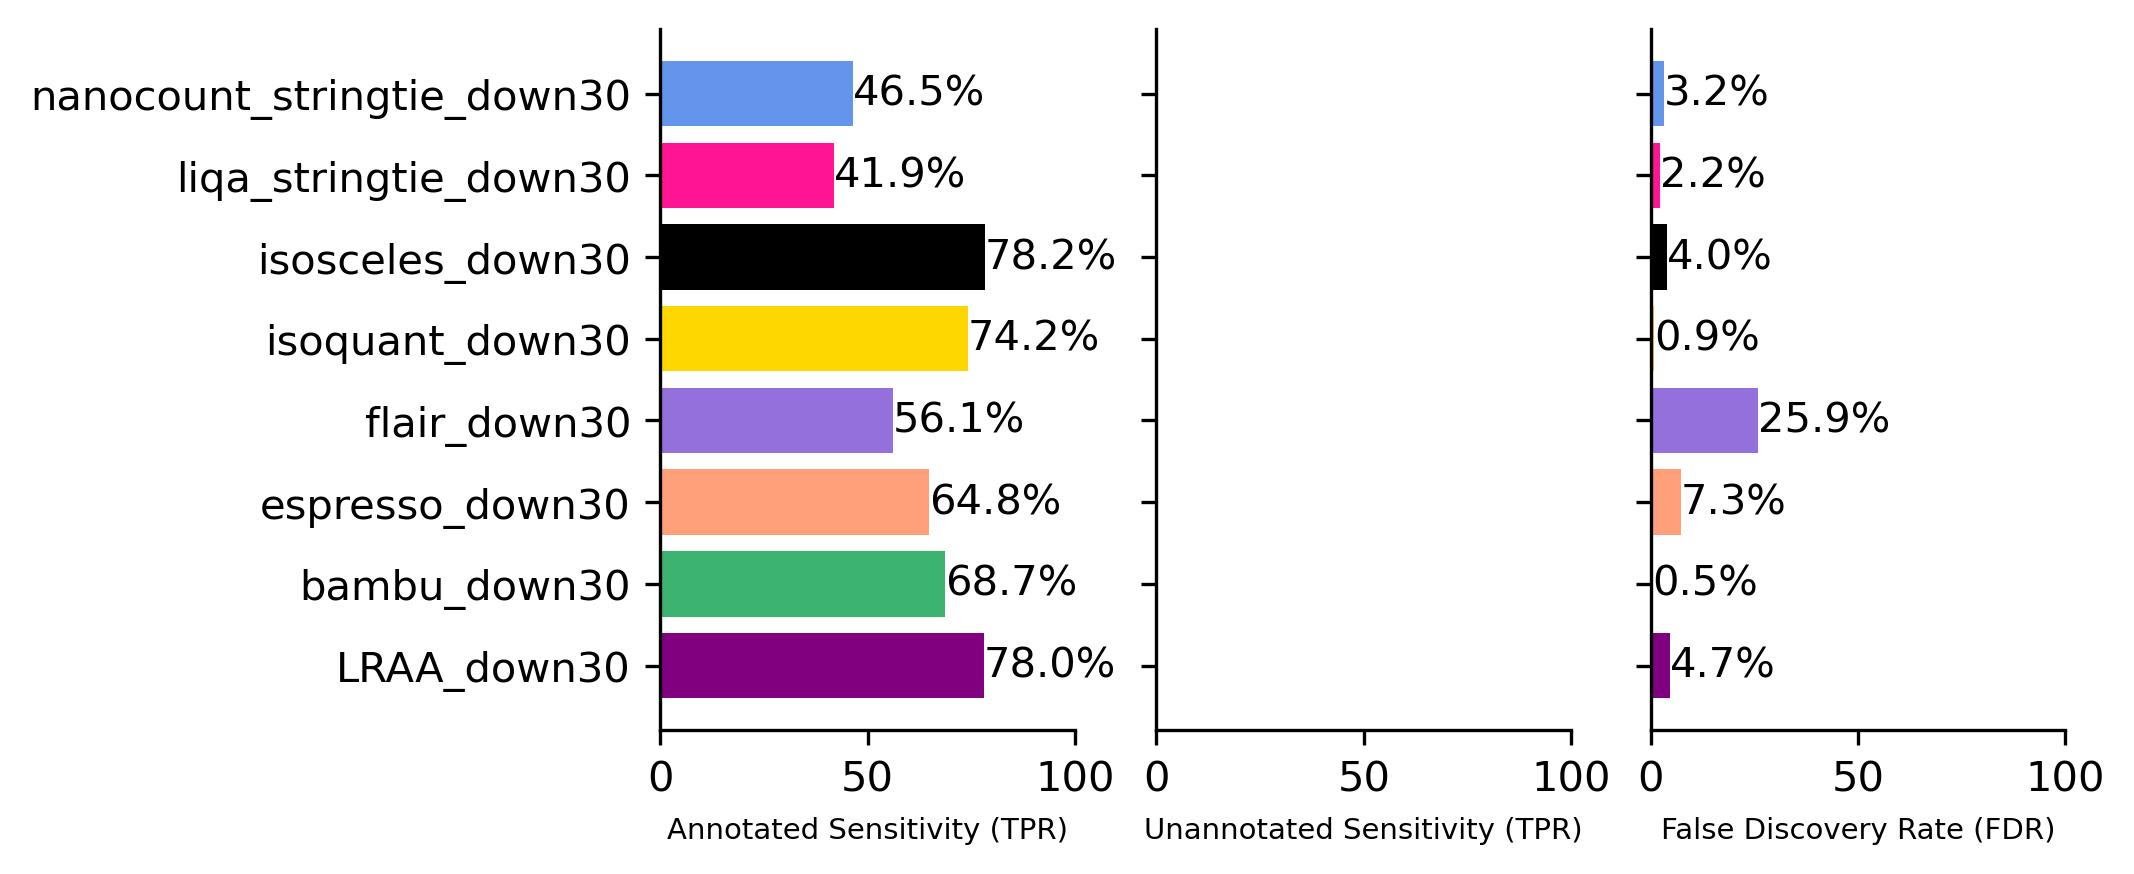

In [348]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, down_30_dict)

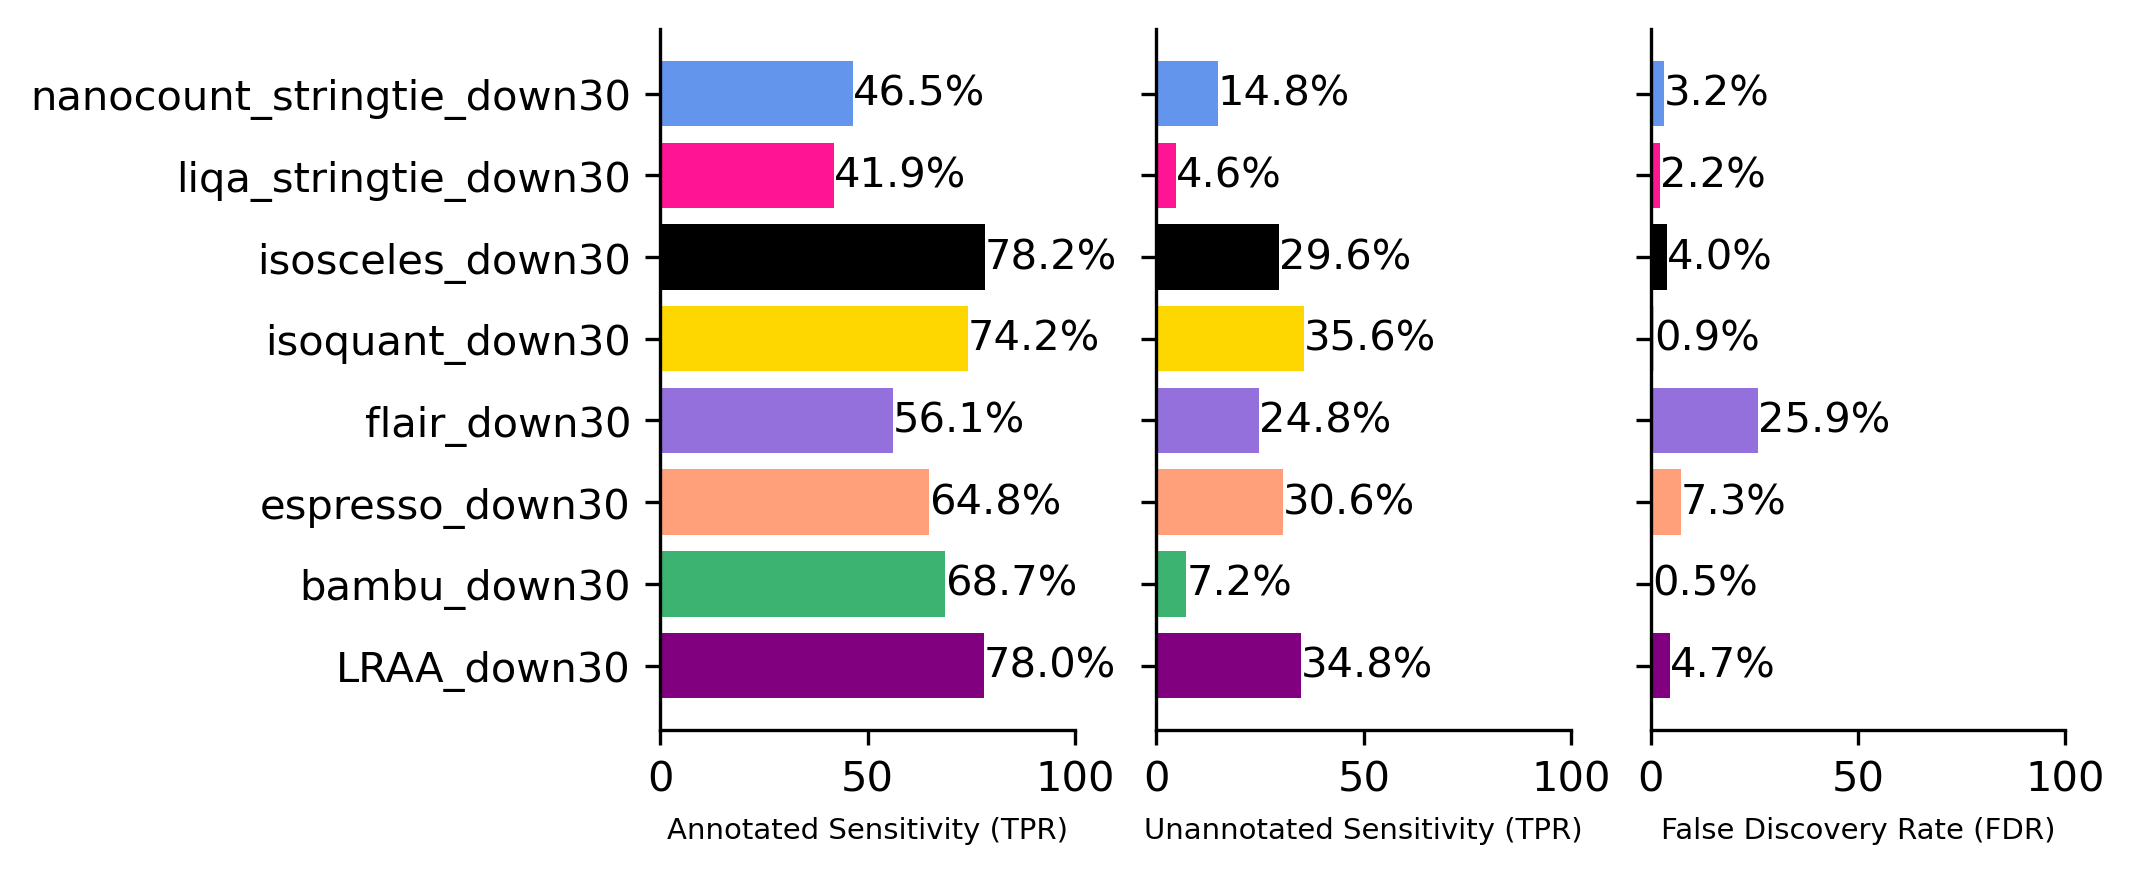

In [352]:
overall_knownTPR_novelTPR_and_FDR_barplot(i_ref_df, down_30_dict, down_30_kept_intron_ids.values)